# Python para la ciencia de datos – Análisis del fichero "Fitness_Trackers"
+ Grupo: 6
+ Autores: BORREGUERO NAVA, JUAN JOSÉ y AMZIGH BEN MOUSSA, MONCEF

In [50]:
#Instalamos algunos paquetes
!pip install pandas plotnine
!pip install pingouin
!pip install scipy

#Cargamos las librerias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from plotnine.data import mpg
import pingouin as pg
from scipy import stats
import pingouin as pg
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://repo.forge.lmig.com/api/pypi/python/simple
Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



Looking in indexes: https://repo.forge.lmig.com/api/pypi/python/simple
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193650 sha256=3b7ca00a6fd035a23a46315f1486c770c9c638d33d778abeda5e0048ff93c6ce
  Stored in directory: c:\users\n0375471\appdata\local\pip\cache\wheels\cd\66\3c\bc87ed595194c6b05d0e2d7091e874e4f8bcc9c62dffaf5924
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7054 sha256=5187b650527d3b650dca5602e9fb397107d6e0a85481ca94b2c9c3d4613c5561
  Stored in directory: c:\users\n0375471\appdata\local\pip\cache\wheels\96\27\5b\8d1f2de4da08d9b79bc2efcfdc5a4f8eb74d14a0c6282eb8ec
Successfully built pingouin littleutils


In [67]:
#Cargamos las BBDD
fitness_trackers = pd.read_csv(r"C:\Users\n0375471\OneDrive - Liberty Mutual\Documentos\MDS\POCD\Python\Fitness_trackers.csv",thousands=',')
fitness_trackers.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,nan
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,nan
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,nan
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,nan
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,nan


In [68]:
#Obtenemos los formatos de las variables:
fitness_trackers.dtypes

Brand_Name                         object
Device_Type                        object
Model_Name                         object
Color                              object
Selling_Price                       int64
Original_Price                      int64
Display                            object
Rating_(Out_of_5)                 float64
Strap_Material                     object
Average_Battery_Life_(in_days)      int64
Reviews                           float64
dtype: object

# Ejercicio 1.

1.- Uno de los primeros pasos para realizar un buen análisis de datos es familiarizarnos
con los datos que contiene el fichero a analizar. Para ello, calcularemos los estadísticos
descriptivos elementales de las variables del fichero. Una vez cargados los datos en
nuestro programa Python (utilizando la librería Pandas), calcula los siguientes valores
para cada una de las variables:
+ Número de muestras (valores distintos de missing)
+ Media y desviación estándar de aquellas variables en las que tenga sentido
(numéricas)
+ Valor mínimo y valor máximo de aquellas variables en las que tenga sentido
(numéricas)


In [79]:
#Por preferencia personal, quitamos los espacios existentes en los nombres:
fitness_trackers.columns = fitness_trackers.columns.str.replace(' ', '_')
#Obtenemos los estadíticos que se nos pide para aquellas variables númericas
print((fitness_trackers.describe(include='all').T))

                               count unique             top freq    mean  \
Brand_Name                       565     20         FOSSIL   133     NaN   
Device_Type                      565      2      Smartwatch  490     NaN   
Model_Name                       565    384        Charge 2    8     NaN   
Color                            565    146           Black  193     NaN   
Selling_Price                  565.0    NaN             NaN  NaN 22110.4   
Original_Price                 565.0    NaN             NaN  NaN 25365.4   
Display                          565      7  AMOLED Display  355     NaN   
Rating_(Out_of_5)              514.0    NaN             NaN  NaN     4.2   
Strap_Material                   565     12        Silicone  232     NaN   
Average_Battery_Life_(in_days) 565.0    NaN             NaN  NaN     9.0   
Reviews                         78.0    NaN             NaN  NaN  2492.9   
ratio_duracion_precio          565.0    NaN             NaN  NaN     1.0   

           

# Ejercicio 2.

2.- Hay datos que nos interesa analizar basándonos en agrupaciones, para darle un
sentido a nuestro análisis en base a esa agrupación. Basándonos en las siguientes
agrupaciones:
+ Por tipo de dispositivo
+ Por precio de venta. Estableceremos cuatro grupos en base a la media del precio
de venta de cada tipo de dispositivo:
    + Smartwatches con un precio inferior o igual a la media de precios de
    venta de estos dispositivos
    + Smartwatches con un precio superior a la media de precios de venta de
    estos dispositivos
    + Fitnessbands con un precio inferior o igual a la media de precios de venta
    de estos dispositivos
    + Fitnessbands con un precio superior a la media de precios de venta de
    estos dispositivos
+ Por marca

Calcula los siguientes estadísticos en base a cada una de las agrupaciones definidas
previamente con respecto a las variables selling price, original price, rating, average
battery life in days y reviews:
+ Número de observaciones
+ Número de valores ausentes (missing)
+ Mediana
+ Varianza
+ Valores máximo y mínimo

¿Qué conclusiones podemos sacar de estos cálculos? Comenta los resultados.

In [27]:
#Creamos una nueva variable que contenga las combine las varaibles Selling_Price y Device_Type, para poder asi iterar 
#sobre ella en el siguiente apartado: 

media_precio_venta_Smartwatch = fitness_trackers.loc[(fitness_trackers["Device_Type"] =="Smartwatch"),'Selling_Price'].mean()
media_precio_venta_FitnessBand =  fitness_trackers.loc[(fitness_trackers["Device_Type"] =="FitnessBand"),'Selling_Price'].mean()

condiciones  = [((fitness_trackers['Selling_Price'] <= media_precio_venta_Smartwatch) & (fitness_trackers['Device_Type'] =="Smartwatch")),
                ((fitness_trackers['Selling_Price'] > media_precio_venta_Smartwatch) & (fitness_trackers['Device_Type'] =="Smartwatch")),
              ((fitness_trackers['Selling_Price'] <= media_precio_venta_FitnessBand) & (fitness_trackers['Device_Type'] =="FitnessBand")),
              ((fitness_trackers['Selling_Price'] > media_precio_venta_FitnessBand) & (fitness_trackers['Device_Type'] =="FitnessBand"))]

etiqueta    = ['Smartwatch_and_Selling_Price<=media',
               'Smartwatch_and_Selling_Price>media',
               'FitnessBand_and_Selling_Price<=media',
               'FitnessBand_and_Selling_Price>media']
    
fitness_trackers['Device_Type_and_Selling_Price'] = np.select(condiciones , etiqueta , default=np.nan)

print(fitness_trackers.Device_Type_and_Selling_Price.unique())

#Generamos los principales estadísticos que se nos pide. Para ello, creamos una lista con las variables de interés y 
#mediante un for recorremos la lista y generamos el resumen para cada variable:

variables = ('Device_Type','Device_Type_and_Selling_Price', 'Brand_Name')

for var in variables:
    resultado = fitness_trackers.groupby(var,dropna=False).agg(
                                            {'Selling_Price': ['count', 'median', 'var', 'min', 'max'],
                                            'Original_Price': ['count', 'median', 'var', 'min', 'max'],
                                            'Rating_(Out_of_5)': ['count', 'median', 'var', 'min', 'max'],
                                            'Average_Battery_Life_(in_days)': ['count', 'median', 'var', 'min', 'max'],
                                            'Reviews': ['count', 'median', 'var', 'min', 'max']}).T

    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    print(resultado )

['FitnessBand_and_Selling_Price<=media'
 'Smartwatch_and_Selling_Price<=media'
 'FitnessBand_and_Selling_Price>media'
 'Smartwatch_and_Selling_Price>media']
Device_Type                            FitnessBand  Smartwatch
Selling_Price                  count          75.0       490.0
                               median       2999.0     18990.0
                               var      19614746.8 405548993.8
                               min          1195.0      1395.0
                               max         16999.0    122090.0
Original_Price                 count          75.0       490.0
                               median       3999.0     21990.0
                               var      38827020.6 416166787.3
                               min          1599.0      1995.0
                               max         38500.0    122090.0
Rating_(Out_of_5)              count          75.0       439.0
                               median          4.2         4.3
                        

+ Comentarios:
    + Por tipo de dispositivo, podemos observar comola mediana del precio mediano es de 18.990 unidades monetarias (u.m.) en el caso de los Smartwatch frente a 2.999 u.m. de los FitnessBand. En cuanto a el "Rating" de ambos productos es similar, ya que en ambos casos la mitada de la muestra tiene una valoración infererior a 4,3. Por oto lado, si bien la mediana de la duración en días de la batería es similar, el máximo es en los Smartwatch es de 45 dias, frente a los 20 de los FitnessBand.
    
    + Analizando los dispositivos "FitnessBand_and_Selling_Price<=media" frente "FitnessBand_and_Selling_Price>media", podemos ver que la mediana de la variable "Average_Battery_Life_(in_days)" es idéntica, lo que nos permite entender que la mitad de la muestra en ambas categorías tiene un duración inferior 7 días. Por otra parte, la mayoría de las Reviews son realizadas a la categoría "FitnessBand_and_Selling_Price<=media". Por último, a pesar de que sea obvio, el precio medio original y de venta es muy distinto en ambas muestras cómo es lógico por la forma de hacer las categorías.
    
    + Analizando los dispositivos "Smartwatch_and_Selling_Price<=media" frente "Smartwatch_and_Selling_Price>media", podemos ver que la mediana de la variable "Average_Battery_Life_(in_days)" es idéntica, lo que nos permite entender que la mitad de la muestra en ambos casos tiene una duración media en dias inferior a 7. En este caso, la mediana de la variable "Rating" es ligeremante superior en la categoría "Smartwatch_and_Selling_Price>media". Para esta última categoría, no tenemos ningúna valor para "Rating".
    
    + Por "Brand", podemos observar que las marcas Apple, Garmin y Samsung son las que tienen mayores precios de venta. En cuanto a la valoración o "Rating", observamos que Apple es la marca mejor valorada, ya que al menos la mitada de sus productos tienen una valoración superior a 4,6. Cabe destacar por otra parte que los dispositivos de Apple no han recibido comentarios (algo a estudiar en caso de trabajar con estso datos). La marca Apple, sin embargo, no destaca por la duración de sus baterias, con una mediana de un día. Podemos inferir en este caso que los usuarios valoran otros factores de esta marca.

# Ejercicio 3.

3.- Selecciona los dispositivos en los que la ratio de la duración de la batería con respecto al precio sea superior a la media de ratio de duración, que también debe calcularse.

Comenta los resultados obtenidos.


In [77]:
#Calculamos la columna 'ratio_duracion_precio' para cada uno de los dispositivos de la base de datos
fitness_trackers['ratio_duracion_precio'] = fitness_trackers['Average_Battery_Life_(in_days)'] * 1000 / fitness_trackers['Selling_Price']

#Calculamos la variable media ponderada de la variable 'ratio_duracion_precio', ya que será la media frente a la que comparemos cada fila.
ratio_duracion_precio_ponderado = fitness_trackers['Average_Battery_Life_(in_days)'].sum()  * 1000 / fitness_trackers['Selling_Price'].sum() 

#Realizamos el filtro.
fitness_trackers_ratio_sup_media  = fitness_trackers.loc[(fitness_trackers['ratio_duracion_precio'] > fitness_trackers['ratio_duracion_precio'].mean())]
fitness_trackers_ratio_sup_media.head(n=50)
fitness_trackers['Brand_Name'].value_counts(normalize=True)* 100

FOSSIL     23.5
GARMIN     17.9
APPLE      15.2
FitBit      9.0
SAMSUNG     8.5
huami       6.4
Huawei      4.6
Honor       3.5
Noise       3.0
realme      2.1
Xiaomi      1.8
Fastrack    1.1
boAt        0.7
GOQii       0.7
OnePlus     0.5
LCARE       0.4
Noise       0.4
Oppo        0.4
Infinix     0.2
LAVA        0.2
Name: Brand_Name, dtype: float64

+ Comentarios:
    + Podemos observar en los resultados que las marcas Fossil,Gramin y Apple son las que ofrecen un mejor ratio en terminos de duración / precio. 

# Ejercicio 4.

4.- Ordena los dispositivos en base a la ratio calculada (de mayor a menor). ¿En qué dispositivos hay una mayor relación duración / precio? ¿Cuál es la marca que más relaciona el precio de venta con la duración de la batería?

<AxesSubplot:xlabel='Device_Type', ylabel='Device_Type'>

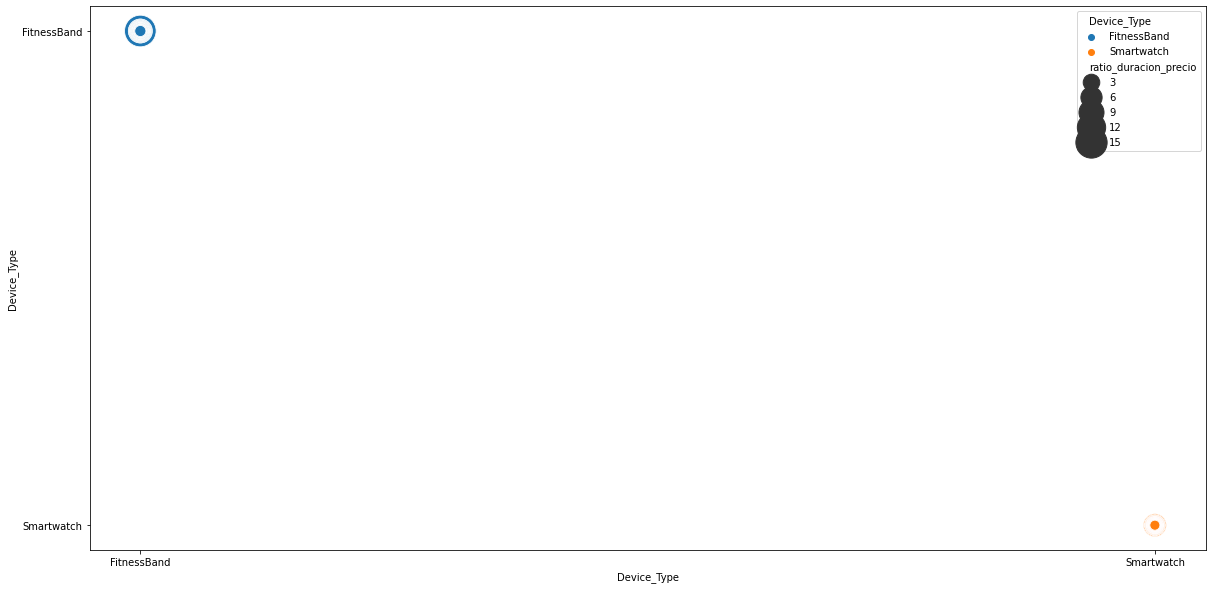

In [74]:
#Ordenamos la base de datos en función de la variable "ratio_duración_precio".
fitness_trackers_sorted = fitness_trackers.sort_values(by=['ratio_duracion_precio'], ascending=False)
#fitness_trackers['Device_Type'].value_counts(normalize=True)* 100

#¿En qué dispositivos hay una mayor relación duración / precio?
plt.figure(figsize=(20, 10))
sns.scatterplot(data=fitness_trackers_sorted, x='Device_Type', y='Device_Type',hue='Device_Type',size=fitness_trackers_sorted['ratio_duracion_precio'],sizes=(100,1000))


+ ¿En qué dispositivos hay una mayor relación duración / precio?
    + Podemos observar con el gráfico anterior que los "Device_type" tipo "FirnessBand"  presentan una ratio de duración mas alto que los "Smartwatch". Se trata de un reusltado a priori lógico, ya que los Smartwach consumen mas bateria al tener mejor tipo de pantalla y mayores funcionalidades.

<AxesSubplot:xlabel='Selling_Price', ylabel='Original_Price'>

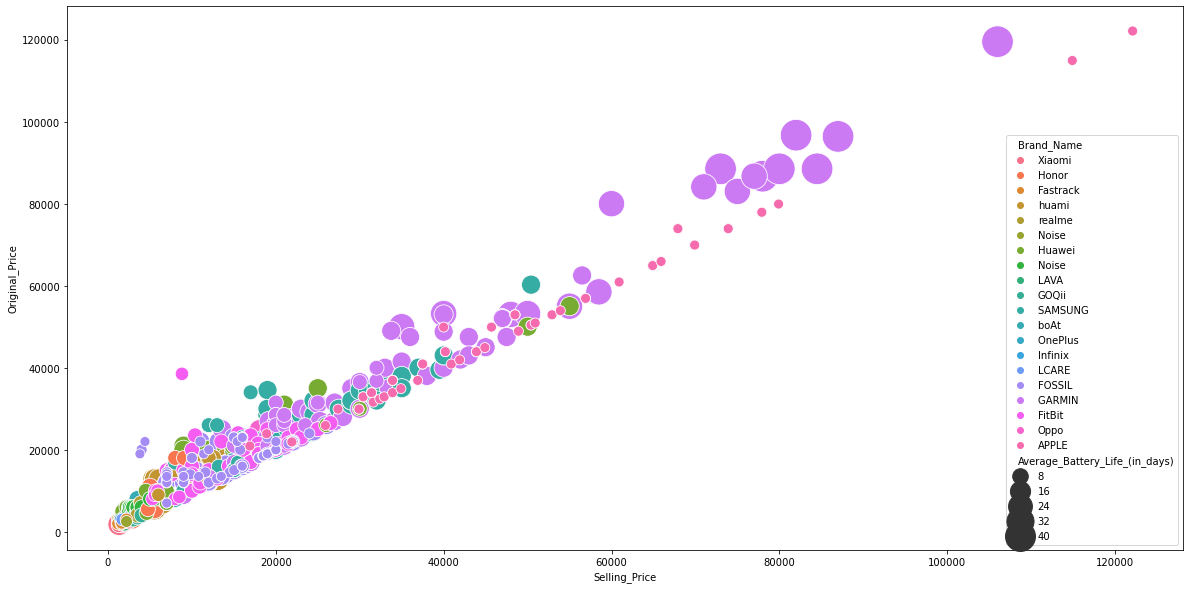

In [75]:
#¿Cuál es la marca que más relaciona el precio de venta con la duración de la batería?
plt.figure(figsize=(20, 10))
sns.scatterplot(data=fitness_trackers_sorted, x='Selling_Price', y='Original_Price',hue='Brand_Name',size=fitness_trackers_sorted['Average_Battery_Life_(in_days)'],sizes=(100,1000))

+ Comentarios:
    + Podemos observar en el gráfico anterior que para la marca Garmin, la duración media de la bateria aumenta a medida que aumenta el precio. Por otro lado, vemos por ejemplo que en el caso de Apple, el precio del dispostivo es independiente de la duración media de la batería, ya que ante aumentos de precio la duración media es similar.

# Ejercicio 5.

5.- Obtén el total de ingresos por la venta de estos dispositivos para cada una de las marcas que aparecen en el conjunto de datos

In [280]:
# Sumamos los ingresos totales por marca
ingresos_totales_por_marca = fitness_trackers.groupby('Brand_Name').agg(Ingresos_Totales=('Selling_Price', 'sum'))
ingresos_totales_por_marca

,Ingresos_Totales
Brand_Name,
APPLE,4249590
FOSSIL,1838719
Fastrack,10525
FitBit,714961
GARMIN,3538861
GOQii,12496
Honor,110200
Huawei,412740
Infinix,1499


# Ejercicio 6.

6.- Representa la información obtenida en el ejercicio 5 mediante un diagrama de
#barras, pero sólo para las 5 marcas con los porcentajes de ingresos más elevados.

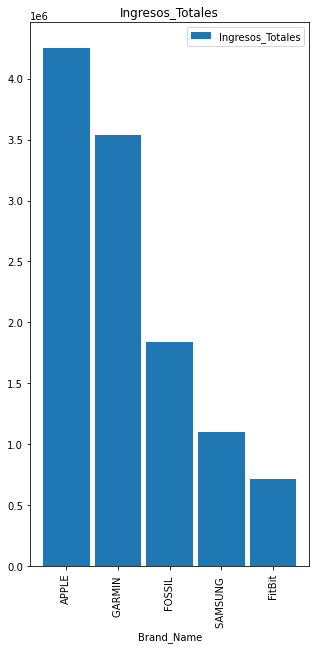

In [282]:
#Seleccionamos las 5 marcas con mayores ingresos totales:
ingresos_totales_por_marca.nlargest(5,'Ingresos_Totales').plot(kind = 'bar',width=0.9,subplots=True,figsize=(5,10));

# Ejercicio 7.

7.- Estudia la correlación entre las variables y represéntala de la forma que consideres más precisa (swarmplots, mapas de calor…). ¿Existe alguna correlación que llame especialmente la atención? Comenta los resultados.

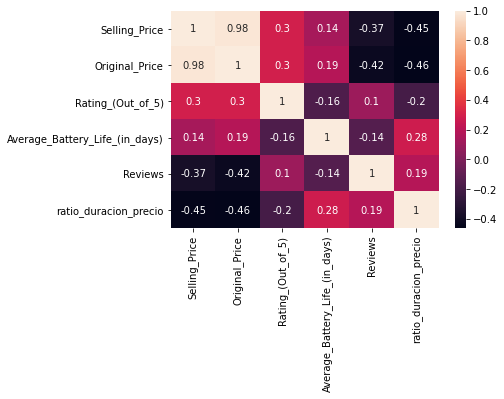

In [285]:
corrMatrix = fitness_trackers.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

+ Comentario: 
    + La correlación entre "precio de venta" y "precio original" es lógica y su sentido es positivo, a mayor "precio original" mayor "precio de venta". Llama la atención la correlación negativa entre "reviews" y "precio de venta", ya que a mayor precio de venta menores "reviews". 

# Ejercicio 8.

8.- Representa mediante un boxplot el precio de los dispositivos por marca. Comenta los resultados.

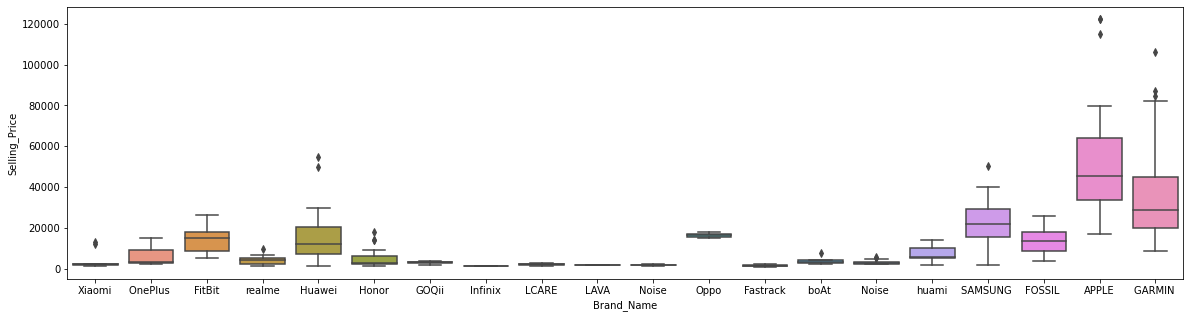

In [71]:
#Representamos un Boxplot 
fig, ax = plt.subplots(figsize=(20,5))
ax = sn.boxplot(x="Brand_Name", y="Selling_Price", data=fitness_trackers)

+ Comentario: 
    + Podemos observar que Apple, Garmin, Samsung y Fossil son las marca que mayores precios de venta. Podemos ver además que en las marcas Apple y Garmin la media es superior a la mediana.
    + Por otro lado, las marcas Garmin, Apple, Samsung, Noise, Honor, Huawei, Realme y Xiami cuentan con alguna dispostivos con un precio de venta muy alto, superior al 1,5 x Rango Intercuartil. 
    + Apple y Garmin presentan la mayor dispersión de precios de venta. 

# Ejercicio 9.

9.- Selecciona dos o más variables que te llamen la atención y analiza los datos mediante las gráficas o mediciones estadísticas que consideres oportunas y comenta los resultados que obtengas.

+ Para este ejercicio, hemos esocgido las siguientes variables:
    + Rating_(Out_of_5)
    + Strap_Material

C:\Users\n0375471\AppData\Roaming\Python\Python38\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_count : Removed 51 rows containing non-finite values.
C:\Users\n0375471\AppData\Roaming\Python\Python38\site-packages\plotnine\positions\position.py:204: PlotnineWarning: position_stack requires non-overlapping x intervals


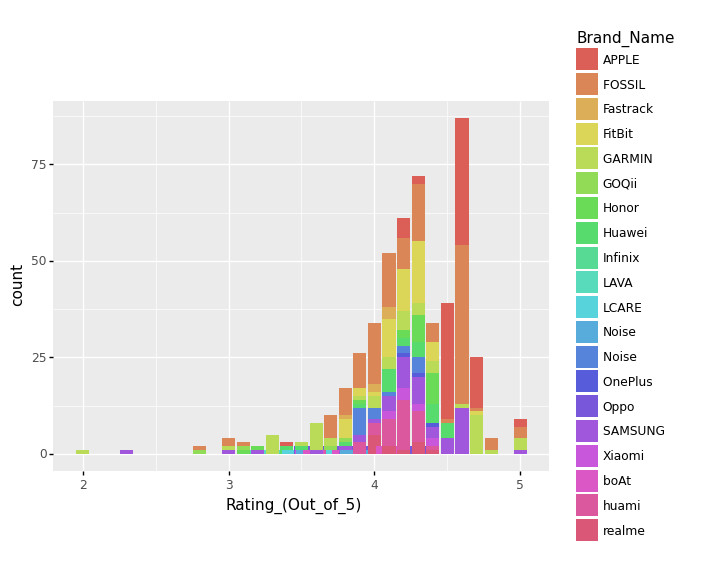

<ggplot: (173820216586)>

In [42]:
#Representamos un gráfico de barras para "Rating_(Out_of_5)" y dentro incluimos el nº de dispositivos de cada marca.
ggplot(fitness_trackers, aes(x='Rating_(Out_of_5)', fill = 'Brand_Name')) + geom_bar(stat = 'count')

+ Comentario: 
    + Podemos observar que Apple concentra la mayor parte de la distribución su "Rating_(Out_of_5)"  entre 4,5 y 5, siendo la marca que mejor valoración tiene en compración con el resto. La siguiente marca, Fossil, también tiene una gran cantidad de "Rating_(Out_of_5)" en ese intervalo, si bien la distribución de Fossil es mas dispersa, habiendo una gran cantidad de valoraciones entre 3,5 y 4,5.


C:\Users\n0375471\AppData\Roaming\Python\Python38\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_count : Removed 51 rows containing non-finite values.
C:\Users\n0375471\AppData\Roaming\Python\Python38\site-packages\plotnine\positions\position.py:204: PlotnineWarning: position_stack requires non-overlapping x intervals


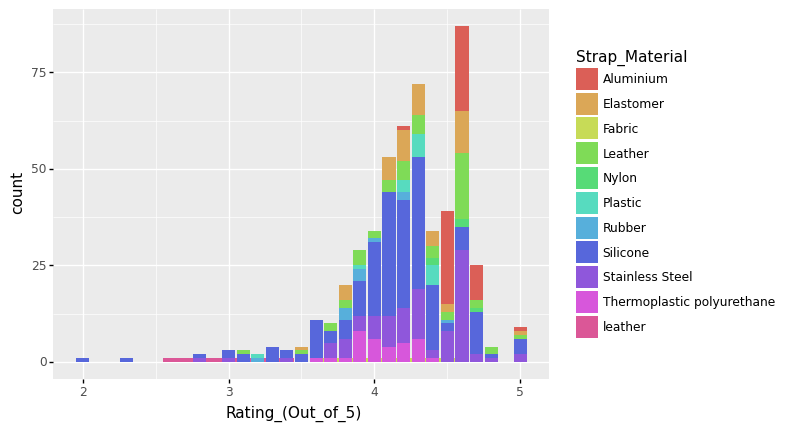

<ggplot: (173817922314)>

In [48]:
ggplot(fitness_trackers, aes(x='Rating_(Out_of_5)', fill = 'Strap_Material')) + geom_bar(stat = 'count')

+ Comentario: 
    + En este caso, queremos comprobar si el material influye en la valoración de los clientes. A la vista de los resultados, podemos obervar como los dispositivos que contienen "Silicone" presentan una distribución asimetrica hacia la izquierda (valoracions bajas). Encontramos también que los dispositivos que contienen "leather" también se encuentran distribuidos entorno a a puntuaciones bajas, si bien la muestra no es grande como para confirmar este hecho. 
   + En el otro extremo, podemos ver que los dispositivos que contienen "Aluminium" se encuentran distribuidos en puntuaciones altas (4,5 en adelante). Esto también ocurre (en menor medida ya que hay mas exposicición entre 3.5 y 4) en el caso de "Stainless Steel".
  + Podemos por tanto concluir a nivel visual, (si bien habría que hacer mas test estadisticos), que existe cierta correlación entre la variable "Strap_Material" y la variable "Rating_(Out_of_5)".  
  
+ Con el objetivo de test una de las hipótesis anteriores de una manera estadística, llevamos a cabo un test de igualdad de media para datos independientes, donde nuestro objetivo será comporbar si los dispositivos construidos con "Aluminium" y aquellos construidos con "Silicone" presentan media de "Rating_(Out_of_5)" diferentes.

In [69]:
#Creamos dos subset de datos filtrando por nuestra variables de interés.
Rating_Aluminium = fitness_trackers.loc[fitness_trackers.Strap_Material == 'Aluminium', 'Rating_(Out_of_5)']
Rating_Silicone = fitness_trackers.loc[fitness_trackers.Strap_Material == 'Silicone', 'Rating_(Out_of_5)']

res = stats.ttest_ind(Rating_Aluminium.dropna(), Rating_Silicone.dropna(), equal_var=True)
print(res)

Ttest_indResult(statistic=8.146082987134985, pvalue=1.7770920558450196e-14)


+ A la vista del resultado, el p-valor obtenido es menor al nivel de significación alpha 0.05, por lo que podemos concluir que la valoración media en dispositivos construidos con "Aluminium" es estadísticamente diferente a la valoración media de dispositivos construidos con "Silicone".